Saving sales-of-shampoo-over-a-three-ye (1).csv to saleOfShampoo.csv/sales-of-shampoo-over-a-three-ye (1).csv


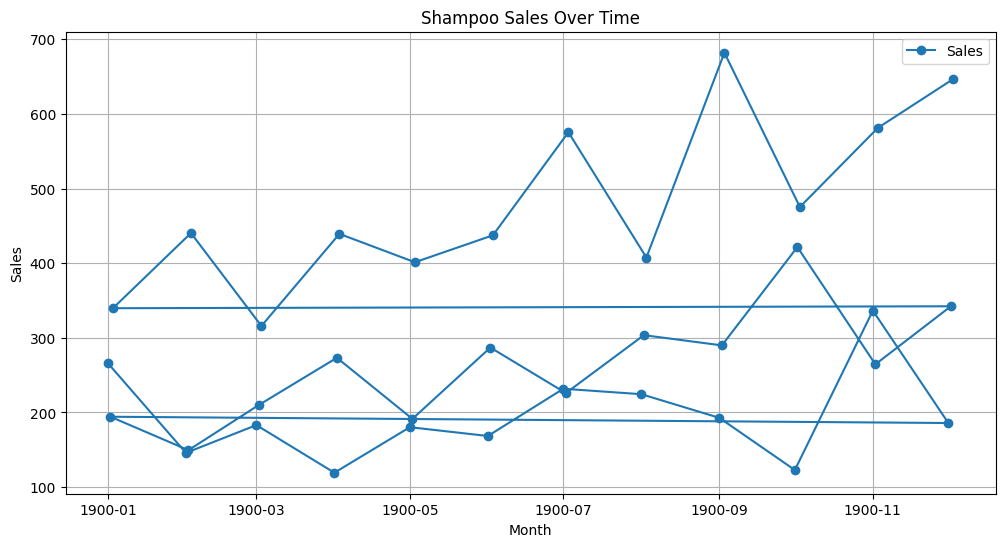

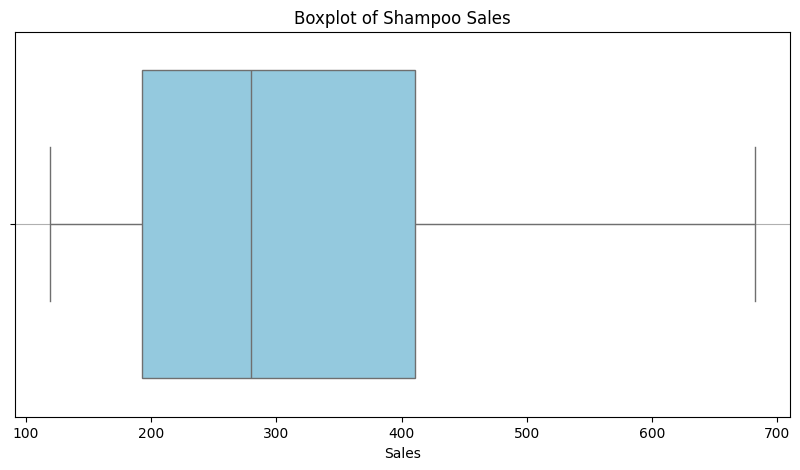

Outliers detected:
 Empty DataFrame
Columns: [Month, Sales]
Index: []


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload("saleOfShampoo.csv")

file_name = list(uploaded.keys())[0]
shampoo_sales_data = pd.read_csv(file_name)

# Rename columns for easier handling
shampoo_sales_data.columns = ['Month', 'Sales']

# Convert 'Month' to a datetime object and handle missing or incorrect data
shampoo_sales_data['Month'] = pd.to_datetime(shampoo_sales_data['Month'], format='%d-%b', errors='coerce')
shampoo_sales_data['Sales'] = pd.to_numeric(shampoo_sales_data['Sales'], errors='coerce')

# Drop rows with invalid data
shampoo_sales_data.dropna(inplace=True)

# Reset index
shampoo_sales_data = shampoo_sales_data.reset_index(drop=True)

# Plot the sales data over time
plt.figure(figsize=(12, 6))
plt.plot(shampoo_sales_data['Month'], shampoo_sales_data['Sales'], marker='o', label='Sales')
plt.title("Shampoo Sales Over Time")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid()
plt.show()

# Create a boxplot to detect outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=shampoo_sales_data, x='Sales', color='skyblue')
plt.title("Boxplot of Shampoo Sales")
plt.xlabel("Sales")
plt.grid(axis='y')
plt.show()

# Identify outliers using the IQR method
Q1 = shampoo_sales_data['Sales'].quantile(0.25)
Q3 = shampoo_sales_data['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = shampoo_sales_data[(shampoo_sales_data['Sales'] < lower_bound) | (shampoo_sales_data['Sales'] > upper_bound)]

# Display outliers if any
print("Outliers detected:\n", outliers)
